This is Part 3 a <a href="http://gettoknowdata.com/category/exploring-data/hotel-bookings/">multi-part series</a> exploring a dataset with data on hotel bookings.

I found the original hotel booking demand data at <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191" target="_blank">ScienceDirect</a>. It's also available in a slightly more processed form on <a href="https://www.kaggle.com/jessemostipak/hotel-booking-demand" target="_blank">Kaggle</a>.

This first block of code gets us to the point where we left off in <a href="https://gettoknowdata.com/hotel-bookings-part-2/" target="_blank">Part 2</a>.

In [1]:
###############################################
######## START CODE FROM PARTS 1 AND 2 ########
###############################################

# Import pandas 
# so we can view the data 
# as a dataframe
# Import calendar 
# so we can work with dates and times
import pandas as pd 
import calendar

# Read the resort hotel data (H1.csv) 
# and city hotel data (H2.csv)
# into two separate dataframes 
# named resort_hotel and
# city_hotel  data, respecively
resort_hotel = \
    pd.read_csv('H1.csv')

city_hotel = \
    pd.read_csv('H2.csv')

# Change all of the NaN values
# in the Children column
# of the city hotel dataframe
# from NaN to 0
city_hotel['Children'].fillna(value=0,
                              inplace=True)

# Change the datatype 
# of the Children column
# in the city hotel dataframe
# to int64
city_hotel['Children'] = \
    city_hotel['Children'].astype('int64')

# Add a Hotel column to 
# both the resort hotel dataframe
# and the city hotel dataframe
# and fill each with 'Resort' and
# 'City', respectively"
resort_hotel['Hotel'] = \
    'Resort'
city_hotel['Hotel'] = \
    'City'

# Combine (concatenate) the
# resort hotel dataframe and the
# city hotel dataframe
# into a single dataframe
# named resort_and_city_hotel
resort_and_city_hotel = \
    pd.concat([resort_hotel,
               city_hotel],
              axis=0)

# Reset the index of the
# resort and city hotel dataframe
resort_and_city_hotel.reset_index(drop=True,
                                  inplace=True)

# Map month names to integers
months = {'January':1,
          'February':2,
          'March':3,
          'April':4,
          'May': 5,
          'June': 6,
          'July': 7,
          'August': 8,
          'September': 9,
          'October': 10,
          'November': 11,
          'December': 12}

# Replace the categorical month names
# in the ArrivalDateMonth variable
# with the integers 
# from the months dictionary
resort_and_city_hotel.ArrivalDateMonth = \
    resort_and_city_hotel.ArrivalDateMonth.map(months)

# Rename the ArrivalDateYear, 
# ArrivalDateMonth, and 
# ArrivalDateDayOfMonth variables
# to year, month, day (respectively) 
# so the date concat will work
resort_and_city_hotel.rename(columns=
                             {'ArrivalDateYear': 'year',
                              'ArrivalDateMonth': 'month',
                              'ArrivalDateDayOfMonth': 'day'},
                             inplace=True)

# Add the new ArrivalDate column
# cast this new column as
# a datetime datatype
# and combine the the 
# year, month, and day columns 
# to create the (new) dates
resort_and_city_hotel['ArrivalDate'] = \
    pd.to_datetime(resort_and_city_hotel[[
    'year', 
    'month', 
    'day']])

# Drop the year, month, day, 
# ArrivalDateWeekNumber,
# StaysInWeekendNights, and 
# StaysInWeekNights columns
# from the resort and city hotel dataframe
resort_and_city_hotel.drop(['year',
                            'month',
                            'day',
                            'ArrivalDateWeekNumber',
                            'StaysInWeekendNights',
                            'StaysInWeekNights'],
                           axis=1,
                           inplace=True)

# Change the ReservationStatusDate 
# to the datetime64[ns] datatype
resort_and_city_hotel['ReservationStatusDate'] = \
    resort_and_city_hotel['ReservationStatusDate'] \
    .astype('datetime64[ns]')

# In the resort_and_city_hotel dataframe
# change every 0 to an n
# and every 1 to a y
# in the IsCanceled and
# IsRepeatedGuest columns
resort_and_city_hotel.loc[
    resort_and_city_hotel['IsCanceled'] == 0,
    'IsCanceled'] = 'n'
resort_and_city_hotel.loc[
    resort_and_city_hotel['IsCanceled'] == 1,
    'IsCanceled'] = 'y'
resort_and_city_hotel.loc[
    resort_and_city_hotel['IsRepeatedGuest'] == 0,
    'IsRepeatedGuest'] = 'n'
resort_and_city_hotel.loc[
    resort_and_city_hotel['IsRepeatedGuest'] == 1,
    'IsRepeatedGuest'] = 'y'

# Reorder the columns in the
# resort_and_city_hotel dataframe
resort_and_city_hotel = resort_and_city_hotel[
    ['Adults',
     'Children',
     'Babies',
     'Meal',
     'ReservedRoomType',
     'RequiredCarParkingSpaces',
     'Country',
     'ArrivalDate',
     'Agent',
     'Company',
     'CustomerType',
     'IsRepeatedGuest',
     'PreviousCancellations',
     'PreviousBookingsNotCanceled',
     'Hotel',
     'IsCanceled',
     'BookingChanges',
     'DaysInWaitingList',
     'TotalOfSpecialRequests',
     'DepositType',
     'MarketSegment',
     'DistributionChannel',
     'AssignedRoomType',
     'ADR',
     'LeadTime',
     'ReservationStatus',
     'ReservationStatusDate']]

###############################################
######## END CODE FROM PARTS 1 AND 2 ##########
###############################################

Let's take a look at the dataframe.

In [2]:
resort_and_city_hotel

,Adults,Children,Babies,Meal,ReservedRoomType,RequiredCarParkingSpaces,Country,ArrivalDate,Agent,Company,...,DaysInWaitingList,TotalOfSpecialRequests,DepositType,MarketSegment,DistributionChannel,AssignedRoomType,ADR,LeadTime,ReservationStatus,ReservationStatusDate
0,2,0,0,BB,C,0,PRT,2015-07-01,NULL,NULL,...,0,0,No Deposit,Direct,Direct,C,0.00,342,Check-Out,2015-07-01
1,2,0,0,BB,C,0,PRT,2015-07-01,NULL,NULL,...,0,0,No Deposit,Direct,Direct,C,0.00,737,Check-Out,2015-07-01
2,1,0,0,BB,A,0,GBR,2015-07-01,NULL,NULL,...,0,0,No Deposit,Direct,Direct,C,75.00,7,Check-Out,2015-07-02
3,1,0,0,BB,A,0,GBR,2015-07-01,304,NULL,...,0,0,No Deposit,Corporate,Corporate,A,75.00,13,Check-Out,2015-07-02
4,2,0,0,BB,A,0,GBR,2015-07-01,240,NULL,...,0,1,No Deposit,Online TA,TA/TO,A,98.00,14,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,2,0,0,BB,A,0,BEL,2017-08-30,394,NULL,...,0,0,No Deposit,Offline TA/TO,TA/TO,A,96.14,23,Check-Out,2017-09-06
119386,3,0,0,BB,E,0,FRA,2017-08-31,9,NULL,...,0,2,No Deposit,Online TA,TA/TO,E,225.43,102,Check-Out,2017-09-07
119387,2,0,0,BB,D,0,DEU,2017-08-31,9,NULL,...,0,4,No Deposit,Online TA,TA/TO,D,157.71,34,Check-Out,2017-09-07
119388,2,0,0,BB,A,0,GBR,2017-08-31,89,NULL,...,0,0,No Deposit,Online TA,TA/TO,A,104.40,109,Check-Out,2017-09-07


Okay. Good. That's what we were expecting: 119,390 rows and 27 variables (columns).

And let's look at the datatypes again.

In [3]:
resort_and_city_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Adults                       119390 non-null  int64         
 1   Children                     119390 non-null  int64         
 2   Babies                       119390 non-null  int64         
 3   Meal                         119390 non-null  object        
 4   ReservedRoomType             119390 non-null  object        
 5   RequiredCarParkingSpaces     119390 non-null  int64         
 6   Country                      118902 non-null  object        
 7   ArrivalDate                  119390 non-null  datetime64[ns]
 8   Agent                        119390 non-null  object        
 9   Company                      119390 non-null  object        
 10  CustomerType                 119390 non-null  object        
 11  IsRepeatedGuest           

In this post, I'm going to start exploring individual *categorical* (aka *qualitative*) variables. 

Let's take a look at all of the categorical variables. *Note:* This is one of the reasons why, in <a href="https://gettoknowdata.com/hotel-bookings-part-2/" target="_blank">Part 2 of this series</a>, we changed the IsCanceled and IsRepeatedGuest *categorical* variables from ints to objects. If we had not done this, then those columns wouldn't appear in this view of all of the *categorical* variables.

In [4]:
# Show only the object (categorical variable) columns
resort_and_city_hotel.select_dtypes('object')

,Meal,ReservedRoomType,Country,Agent,Company,CustomerType,IsRepeatedGuest,Hotel,IsCanceled,DepositType,MarketSegment,DistributionChannel,AssignedRoomType,ReservationStatus
0,BB,C,PRT,NULL,NULL,Transient,n,Resort,n,No Deposit,Direct,Direct,C,Check-Out
1,BB,C,PRT,NULL,NULL,Transient,n,Resort,n,No Deposit,Direct,Direct,C,Check-Out
2,BB,A,GBR,NULL,NULL,Transient,n,Resort,n,No Deposit,Direct,Direct,C,Check-Out
3,BB,A,GBR,304,NULL,Transient,n,Resort,n,No Deposit,Corporate,Corporate,A,Check-Out
4,BB,A,GBR,240,NULL,Transient,n,Resort,n,No Deposit,Online TA,TA/TO,A,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,BB,A,BEL,394,NULL,Transient,n,City,n,No Deposit,Offline TA/TO,TA/TO,A,Check-Out
119386,BB,E,FRA,9,NULL,Transient,n,City,n,No Deposit,Online TA,TA/TO,E,Check-Out
119387,BB,D,DEU,9,NULL,Transient,n,City,n,No Deposit,Online TA,TA/TO,D,Check-Out
119388,BB,A,GBR,89,NULL,Transient,n,City,n,No Deposit,Online TA,TA/TO,A,Check-Out


Okay. Good. We have 14 categorical variables to explore.

Let's start by getting a count of the number of unique values in each of the categorical variables.

In [5]:
# How many unique values 
# are there in each 
# categorical variable?
resort_and_city_hotel.select_dtypes('object').nunique()

Meal                     5
ReservedRoomType        10
Country                177
Agent                  334
Company                353
CustomerType             4
IsRepeatedGuest          2
Hotel                    2
IsCanceled               2
DepositType              3
MarketSegment            8
DistributionChannel      5
AssignedRoomType        12
ReservationStatus        3
dtype: int64

Anything in particular jump out at you? Write down any questions this information generates for you.

For me, it seems interesting that there are 10 different *reserved* room types but 12 different *assigned* room types. I'm going to write that down as a question: "Why are there 10 reserved room types versus 12 assigned room types?" That might be something worth exploring later. 

The other thing that stands out to me here is that 177 countries are represented in the data. That's the majority of countries on earth. First question that comes to mind for me is, "Which countries are represented in the data?" That's something we'll answer fairly soon.

Okay, so now we know *how many* unique values are in each variable (see why they're called **vari**ables?). One logical follow-on question might be, "*What are* the unique values in each variable?"

Let's answer that for each variable and see what else we might uncover.

We'll start with meals.

In [6]:
# What are the unique values
# in the Meal variable
# and how many are there of each?
resort_and_city_hotel['Meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: Meal, dtype: int64

What's the first thing you notice about the meals? For me, the first thing I notice is that 1169 of them are undefined. 

Let's see if we can figure out what that means. Is it an error that we need fix? Not sure yet. 

The <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191#t00051" target="_blank">Variables description table in the ScienceDirect article</a> tells us that:
* Undefined/SC = no meal package
* BB = Bed & Breakfast;
* HB = Half board (breakfast and one other meal – usually dinner)
* FB = Full board (breakfast, lunch and dinner)

Okay. To me this means Undefined and SC are equivalent; namely, the customer did not select a meal package. I don't think this is an error in the data, per se, but it is something I'd like to fix before I go any further. I want all Undefined and SCs to be the same value because they mean the same thing. To me, neither "Undefined" nor "SC" aligns with the other abbreviations. For example, BB standing for Bed & Breakfast makes sense. So does HB for Half Board and FB for Full Board. So, let's change all of the Undefined and SC values to NM for No Meal.

Before we do that, let's get the total count of Undefined and SC values so we know how many NMs we should end up with.

In [7]:
# Add the number of SC entries
# in the Meal column
# to the number of Undefined entries
# in the Meal column
# and display the answer
resort_and_city_hotel['Meal'].value_counts()[2] \
    + resort_and_city_hotel['Meal'].value_counts()[3]

11819

Alright. So, if we do this correctly, we should end up with 11,819 NM entries in the Meal column.

Let's try that.

In [8]:
# In the Meal column
# of the resort_and_city_hotel dataframe
# change every Undefined and every SC 
# to NM 
resort_and_city_hotel.loc[resort_and_city_hotel['Meal'] == \
                          'Undefined', 'Meal'] = 'NM'
resort_and_city_hotel.loc[resort_and_city_hotel['Meal'] == \
                          'SC', 'Meal'] = 'NM'

Check our work . . .

In [9]:
resort_and_city_hotel['Meal'].value_counts()

BB           92310
HB           14463
SC           10650
NM            1169
FB             798
Name: Meal, dtype: int64

Hmm . . . something's wrong. The Undefined values changed to NM but the SC values did not.

I'm not 100% sure why, but if I had to guess, I'd guess there's trailing white space in the column values (there was probably extra white space in the original CSV files). For example, instead of SC being just "SC" it's "SC&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;" (with some amount of white space after it).

Total guess on my part, but it's possible. It can't hurt to remove all leading and trailing white space from every value in the Meal column (just in case that's what the issue is). 

Let's do that.

In [10]:
# Remove all leading and trailing
# white space from the Meal column
resort_and_city_hotel['Meal'] = \
    resort_and_city_hotel['Meal'].str.strip()

To see if that worked, let's try changing all of the SCs to NMs again.

In [11]:
resort_and_city_hotel.loc[resort_and_city_hotel['Meal'] == \
                          'SC', 'Meal'] = 'NM'

Now let's check the value counts in the Meal column again . . .

In [12]:
resort_and_city_hotel['Meal'].value_counts()

BB    92310
HB    14463
NM    11819
FB      798
Name: Meal, dtype: int64

Ah, great! That worked! If we come across a similar issue when analyzing another column, we can use the same type of fix to strip any leading or trailing white space.

Obviously, most of the guests who made reservations chose the Bed and Breakfast meal package.

What if, instead of the count of each unique value, we wanted to know what percentage of all the reservations each unique value is?

In [13]:
# What percentage of the total
# is each unique value
# in the Meal column?
resort_and_city_hotel['Meal'] \
    .value_counts(normalize=True)

BB    0.773180
HB    0.121141
NM    0.098995
FB    0.006684
Name: Meal, dtype: float64

Approximately 77.3% of customers chose the BB meal package, while just under 10% chose no meal package at all.

So this tells us the value counts for *every* reservation at both the resort hotel and the city hotel. What if we want to see the value counts broken out by hotel?

Let's see what that might look like.

In [14]:
# How many of each meal package
# did customers book
# when they made reservations at
# the resort hotel and 
# at the city hotel, respectively?
resort_and_city_hotel.groupby(['Hotel'])['Meal'] \
    .value_counts()

Hotel   Meal
City    BB      62305
        NM      10564
        HB       6417
        FB         44
Resort  BB      30005
        HB       8046
        NM       1255
        FB        754
Name: Meal, dtype: int64

And if we wanted to read these as percentages . . .

In [15]:
# What is the percentage 
# of each meal package
# customers booked
# when they made reservations at
# the resort hotel and 
# at the city hotel?
resort_and_city_hotel.groupby(['Hotel'])['Meal'] \
    .value_counts(normalize=True)

Hotel   Meal
City    BB      0.785390
        NM      0.133165
        HB      0.080890
        FB      0.000555
Resort  BB      0.749001
        HB      0.200849
        NM      0.031328
        FB      0.018822
Name: Meal, dtype: float64

This is interesting. Here again are the percentages for the entire dataset (resort and city hotel combined).

In [16]:
# What percentage of the total
# is each unique value
# in the Meal column?
resort_and_city_hotel['Meal'].value_counts(normalize=True)

BB    0.773180
HB    0.121141
NM    0.098995
FB    0.006684
Name: Meal, dtype: float64

When we compare these to the percentages by hotel type, we can see some similarities and differences.

For example, the individual hotel requests for the Bed and Breakfast (BB) package are fairly close to the percentage for the combined total:
* Combined: 77.3%
* City hotel: 78.5%
* Resort hotel: 74.9%

So, whether we looked at the combined resort and city hotel data or the individual hotel data, approximately three quarters of customers selected the BB meal package. 

The combined data tells us that about 9% of customers did not choose a meal package (NM). But the individual hotel data tells a different story. At the city hotel, 13.3% of customers did not choose a meal package while only 3.1% of customers did not choose a meal package at the resort hotel.

This raises some questions for me:
* Why do nearly 4 times as many customers at the city hotel opt out of a meal package when compared to the resort hotel?
* How are meal packages marketed to customers at each hotel?
* What kinds of food are in the meal packages at each hotel? 
* What would the revenue impact be if we could decrease the 13.3% of customers **not** choosing a meal package at the city hotel to match the 3.1% of customers **not** choosing a meal package at the resort hotel? 
    * Putting a positive spin on that question: Regardless of meal package, what would the revenue impact be if we could **increase** the approximately 86.7% of customers who choose a meal package at the city hotel to match the 96.9% of customers who choose a meal package at the resort hotel?

Here's something else that caught my attention.

Look at the data for the Full Board (FB) meal package.

* Combined: 0.6%
* City hotel: 0.06%
* Resort hotel: 1.9%

In other words, customers at the resort hotel book the FB package approximately 32 times more often than customers at the city hotel. 

What questions come to mind for you when you look at the meal data?

It's important to remember that even though we can come up with these questions simply based on our analysis of the data (it's always good to write down any questions the data generates), it really depends on the business, its mission, and goals as to whether these are questions worth pursuing further. For example, just looking at this data, we have no idea what the costs and margins are on the various meal packages, we don't know how many rooms there are in each hotel, etc. So, always capture questions you have. Then, if and when appropriate, share those questions with the person who has decision authority over the domain represented by the data (in this case, maybe a hotel manager or regional manager). 

Okay. Let's have a look at the categorical variables again.

In [17]:
# Show the info for
# the object (categorical variable) columns
resort_and_city_hotel.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Meal                 119390 non-null  object
 1   ReservedRoomType     119390 non-null  object
 2   Country              118902 non-null  object
 3   Agent                119390 non-null  object
 4   Company              119390 non-null  object
 5   CustomerType         119390 non-null  object
 6   IsRepeatedGuest      119390 non-null  object
 7   Hotel                119390 non-null  object
 8   IsCanceled           119390 non-null  object
 9   DepositType          119390 non-null  object
 10  MarketSegment        119390 non-null  object
 11  DistributionChannel  119390 non-null  object
 12  AssignedRoomType     119390 non-null  object
 13  ReservationStatus    119390 non-null  object
dtypes: object(14)
memory usage: 12.8+ MB


Alright. We looked at the Meal variable. Let's look at the ReservedRoomType variable next.

Now, you might already be thinking about comparing the ReservedRoomType variable to the AssignedRoomType variable. That's definitely something that we should do, but that would be working with *two* variables at the same time.

But we're not doing that right now. Right now, we're just exploring each variable on its own.

That being said, if you think of any questions about how you want to compare the ReservedRoomType and AssignedRoomType variables, write them down so you can come back to them later.

For example, I'm already wondering:
* How many reservations are there where the ReservedRoomType matches the AssignedRoomType?
    * What is the ratio of these reservations to all reservations?
    * What are the ratios of these reservations for each hotel (resort or city)?
* How many reservations are there where the ReservedRoomType does not match the AssignedRoomType?
    * What is the ratio of these reservations to all reservations?
    * What are the ratios of these reservations for each hotel (resort or city)? 
* What do the room types represent?
    * Is there a logical order or progression from one to the next? 
        * For example, is a "B" room an upgrade from an "A" room, a "C" room an upgrade from a "B" room, and so on?
    * Do the room types have the same meaning at each hotel?
        * For example, does an "A" room at the Resort hotel have the same level of amenities as an "A" room at the City hotel? 

Back to the data now.

Let's look at the ReservedRoomType and AssignedRoomType variables individually.

We used numerical summaries above. This time, let's use visualizations. Specifically bar charts.

<AxesSubplot:xlabel='Hotel,ReservedRoomType'>

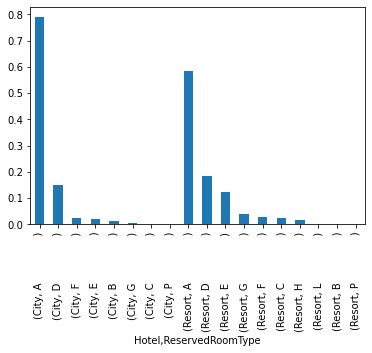

In [18]:
# Display a bar chart
# that shows each ReservedRoomType 
# as a percentage of the
# total number of reservations,
# and group the room types 
# by hotel
resort_and_city_hotel.groupby(['Hotel'])['ReservedRoomType'] \
    .value_counts(normalize=True) \
    .plot(kind="bar")

Wait a minute. I'm not even looking at the data yet. See all that white space in the x axis labels? That looks like the same problem we had when we were looking at the Meal value counts.

Let's see if this happens for the AssignedRoomType variable.

<AxesSubplot:xlabel='Hotel,AssignedRoomType'>

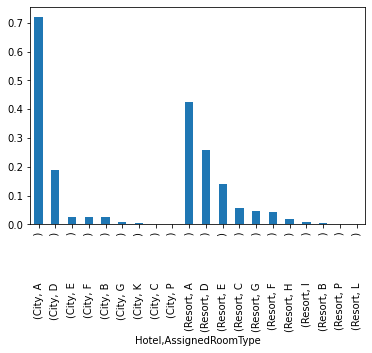

In [19]:
# Display a bar chart
# that shows each AssignedRoomType 
# as a percentage of the
# total number of reservations,
# and group the room types 
# by hotel
resort_and_city_hotel.groupby(['Hotel'])['AssignedRoomType'] \
    .value_counts(normalize=True) \
    .plot(kind="bar")

The white space is there, too. So let's strip all leading and trailing white space from every string in every column in the dataframe. 

In [20]:
# Strip all leading and trailing 
# white space from every string 
# in every column in the dataframe
resort_and_city_hotel = \
    resort_and_city_hotel.applymap(lambda x: x.strip() if type(x)==str else x)

Now let's go back and look at the ReservedRoomType bar chart again.

<AxesSubplot:xlabel='Hotel,ReservedRoomType'>

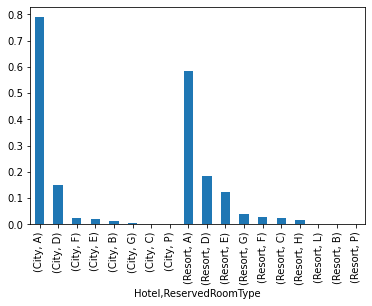

In [21]:
resort_and_city_hotel.groupby(['Hotel'])['ReservedRoomType'] \
    .value_counts(normalize=True) \
    .plot(kind="bar")

And the AssignedRoomType bar chart . . .

<AxesSubplot:xlabel='Hotel,AssignedRoomType'>

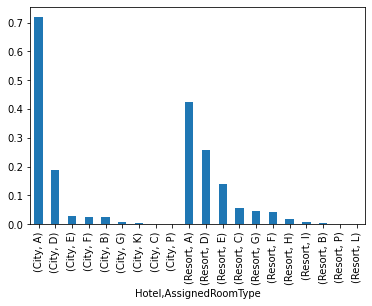

In [22]:
resort_and_city_hotel.groupby(['Hotel'])['AssignedRoomType'] \
    .value_counts(normalize=True) \
    .plot(kind="bar")

All right. That's better. The extra white space is gone. 

Right now, I'm using these bar charts strictly as a way for me to explore the data, so I'm not concerned with refining and editing them. For example, if I were going to present a chart like this to a decision maker, I'd
* Change the chart title to "Assigned Room Types" and put it at the top of the chart
* Label the y axis "Percentage of All Reservations"
* Change the y axis to actual percentages (e.g. "80%" instead of "0.8") 
* Remove the parentheses from the x axis labels
* Change the orientation of the x axis labels to horizontal
* Remove the multiple instances of "City," and "Resort," and center the text "City" and the text "Resort" under their respective sides of the chart
* Change the color of one of the hotel's bars to visually differentiate both sides of the chart

Okay. Back to the data.

It's pretty obvious from looking at these two charts that most guests reserve and receive A-rooms, no matter which hotel they stay in.

But there's a definite difference between the two charts. For example, we can see that approximately 60% of guests at the Resort hotel *reserve* an A-room, but only a little more than 40% of them are *assigned* an A-room. 

There are a lot of things these charts *don't* tell us. For example, if we just look at A-rooms in the Resort hotel, well, wait a minute. Let's look at these two charts as counts of the total reservations rather than ratios of the total reservations . . . then I'll say what I was going to say.

Here's the ReservedRoomType counts.

<AxesSubplot:xlabel='Hotel,ReservedRoomType'>

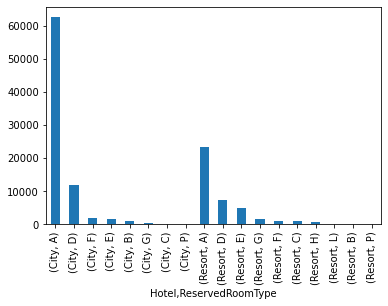

In [23]:
# Display a bar chart
# that shows the count 
# of each ReservedRoomType,
# and group the room types 
# by hotel
resort_and_city_hotel.groupby(['Hotel'])['ReservedRoomType'] \
    .value_counts() \
    .plot(kind="bar")

And the AssignedRoomType counts . . .

<AxesSubplot:xlabel='Hotel,AssignedRoomType'>

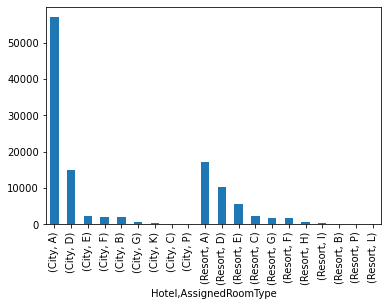

In [24]:
# Display a bar chart
# that shows the count 
# of each AssignedRoomType,
# and group the room types 
# by hotel
resort_and_city_hotel.groupby(['Hotel'])['AssignedRoomType'] \
    .value_counts() \
    .plot(kind="bar")

Looking only at the A-rooms for the Resort hotel, we can see that approximately 25,000 customers *reserved* A-rooms, but only about 19,000 or so customers were *assigned* A-rooms. Well, let's get the exact counts.

In [25]:
# How many of each room type 
# did customers book
# when they made reservations at
# the resort hotel and 
# at the city hotel?
resort_and_city_hotel.groupby(['Hotel'])['ReservedRoomType'] \
    .value_counts()

Hotel   ReservedRoomType
City    A                   62595
        D                   11768
        F                    1791
        E                    1553
        B                    1115
        G                     484
        C                      14
        P                      10
Resort  A                   23399
        D                    7433
        E                    4982
        G                    1610
        F                    1106
        C                     918
        H                     601
        L                       6
        B                       3
        P                       2
Name: ReservedRoomType, dtype: int64

In [26]:
# How many of each room type 
# did customers book
# when they were assigned rooms at
# the resort hotel and 
# at the city hotel?
resort_and_city_hotel.groupby(['Hotel'])['AssignedRoomType'] \
    .value_counts()

Hotel   AssignedRoomType
City    A                   57007
        D                   14983
        E                    2168
        F                    2018
        B                    2004
        G                     700
        K                     279
        C                     161
        P                      10
Resort  A                   17046
        D                   10339
        E                    5638
        C                    2214
        G                    1853
        F                    1733
        H                     712
        I                     363
        B                     159
        P                       2
        L                       1
Name: AssignedRoomType, dtype: int64

I wasn't too far off: 23,399 reserved A-rooms at the Resort hotel and 17,046 were *assigned* A-rooms. But we have no idea from this view of the data whether any of the 17,046 customers who were *assigned* A-rooms *reserved* A-rooms. Maybe none of the 23,399 *reserved A-room* customers are in the group of 17,046 *assigned A-room* customers. Of course, I highly doubt that. My point is, we can't access that level of insight from this particular view of the data (namely, views of individual variables). This is one example of why looking at individual variables is a good way to *start* exploring a dataset. Imagine if we did no further analysis and assumed that the 17,046 customers *assigned* A-rooms also *reserved* A-rooms. And then we made a decision based on this limited view of the data.

Again, though (and this cannot be stressed enough): write down any questions you have about the data. You can always try to figure out ways to get those questions answered.

Alright, let's look at the Country variable.

Here's a count of reservations by country for the combined resort and city hotel data.

In [27]:
resort_and_city_hotel['Country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: Country, Length: 177, dtype: int64

Okay, clearly the vast majority of reservations originate from customers in Portugal. And what if we looked at this as percentages?

In [28]:
resort_and_city_hotel['Country'].value_counts(normalize=True).head(20)

PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
ITA    0.031673
IRL    0.028385
BEL    0.019697
BRA    0.018704
NLD    0.017695
USA    0.017636
CHE    0.014550
CN     0.010757
AUT    0.010622
SWE    0.008612
CHN    0.008402
POL    0.007729
ISR    0.005626
RUS    0.005315
NOR    0.005105
Name: Country, dtype: float64

So 40% of reservations originate from Portugal and about 50% of reservations originate from Portugal *and* the United Kingdom. Put another way, about 50% of reservations originate from only 2 countries while the remaining 50% of reservations come from a mix of 175 other countries.

I wonder how many countries have a reservation count of 1.

In [29]:
# How many countries
# have a reservation count
# equal to 1?
sum(resort_and_city_hotel['Country'].value_counts() == 1)

30

A reservation count of at least 1000?

In [30]:
# How many countries
# have a reservation count
# of at least 1000?
sum(resort_and_city_hotel['Country'].value_counts() >= 1000)

15

A reservation count greater than or equal to 50 and less than or equal to 1000?

In [31]:
# How many countries
# have a reservation count
# greater than or equal to 50
# and less than or equal to 1000?
sum(resort_and_city_hotel['Country'].value_counts().between(50,1000))

42

Okay. Let's move on. The next categorical variable we'll explore is Agent.

According to the <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005" target="_blank">Variables description table in the ScienceDirect article</a>, the number in this column is the "ID of the travel agency that made the booking." 

So the numbers in the column are not numbers we want to sum or do any math on; they are numbers used to anonymize the names of companies. 

Let's check the datatypes again.

In [32]:
# Show the info for
# the object (categorical variable) columns
resort_and_city_hotel.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Meal                 119390 non-null  object
 1   ReservedRoomType     119390 non-null  object
 2   Country              118902 non-null  object
 3   Agent                119390 non-null  object
 4   Company              119390 non-null  object
 5   CustomerType         119390 non-null  object
 6   IsRepeatedGuest      119390 non-null  object
 7   Hotel                119390 non-null  object
 8   IsCanceled           119390 non-null  object
 9   DepositType          119390 non-null  object
 10  MarketSegment        119390 non-null  object
 11  DistributionChannel  119390 non-null  object
 12  AssignedRoomType     119390 non-null  object
 13  ReservationStatus    119390 non-null  object
dtypes: object(14)
memory usage: 12.8+ MB


Okay. Good. That's what I thought. The Agent column is the correct datatype (object) even though it has numbers. And we have zero non-null values in the . . . wait a minute. 

I didn't notice this earlier.

We have zero non-null values in the Agent column, but look at the Country column! Only 118,902 of the rows are non-null. This means there are approximately 500 reservations with no country associated with them. Let's fix that before we do anything with the Agent data.

Let's look at the rows that have a null value in the Country column.

In [33]:
# Display all rows
# with a null value
# in the Country column of
# the resort_and_city_hotel dataframe 
resort_and_city_hotel[resort_and_city_hotel['Country'].isnull()]

,Adults,Children,Babies,Meal,ReservedRoomType,RequiredCarParkingSpaces,Country,ArrivalDate,Agent,Company,...,DaysInWaitingList,TotalOfSpecialRequests,DepositType,MarketSegment,DistributionChannel,AssignedRoomType,ADR,LeadTime,ReservationStatus,ReservationStatusDate
30,1,0,0,BB,A,0,NaN,2015-07-01,NULL,NULL,...,0,2,No Deposit,Direct,Direct,A,62.0,118,Check-Out,2015-07-15
4127,0,0,0,NM,P,0,NaN,2016-02-15,NULL,383,...,0,0,No Deposit,Offline TA/TO,TA/TO,P,0.0,0,Canceled,2016-02-15
7092,1,0,0,BB,A,0,NaN,2016-07-21,NULL,204,...,0,2,No Deposit,Corporate,Corporate,A,73.0,8,Canceled,2016-07-20
7860,2,0,0,HB,A,0,NaN,2016-08-30,NULL,NULL,...,0,5,No Deposit,Direct,Direct,A,159.0,39,Canceled,2016-07-22
8779,1,0,0,BB,A,0,NaN,2016-10-13,NULL,457,...,0,0,No Deposit,Corporate,Corporate,A,50.0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,0,0,0,NM,P,0,NaN,2017-04-10,NULL,279,...,0,0,No Deposit,Complementary,Corporate,P,0.0,0,Canceled,2017-04-10
65909,0,0,0,NM,P,0,NaN,2017-04-10,NULL,279,...,0,0,No Deposit,Complementary,Corporate,P,0.0,0,Canceled,2017-04-10
65910,0,0,0,NM,P,0,NaN,2017-04-10,NULL,279,...,0,0,No Deposit,Complementary,Corporate,P,0.0,0,Canceled,2017-04-10
80830,1,0,0,BB,A,0,NaN,2015-11-23,37,NULL,...,0,0,No Deposit,Groups,TA/TO,A,70.0,4,Check-Out,2015-11-26


Okay. So we have 488 records with no country.

Now, ideally, we'd see if the country data about these records is stored in some other dataset that we can access. For example, maybe the company has point-of-sale data stored in a different dataset and we could access that other dataset, align the records from that dataset with the records from the dataset we're working with, and then update the data in our dataset with the correct country for each record.

But we don't have another dataset. We only have this one. So what should we do? Well, 488 out 119,390 records is les than 1% of the total number of records.

In [34]:
# Divide 488 by 119390
488/119390

0.004087444509590418

To be honest, I'm inclined to drop these records from the dataset. If something seems off as we dive deeper into the data, we can always restore these records and analyze them specifically. But not right now.

Based on what we already learned about the Country data, approximately 40% of these reservations probably came from Portugal, 10% from the UK, 9% from France, and so on. If we were talking about 5% or more of the total number of records (around 6,000 or more records), then it might be worthwhile to assign countries based on these percentages (e.g. assign Portugal to 40% of these records, the UK to 10% of these records, and so on).

Rather than do all that work to less than 1% of the records, let's just drop these 488 records from the dataframe. I believe the effect on futher analysis will be negligible.

In [35]:
# Drop all the rows
# in the resort_and_city_hotel dataframe
# that have a NaN value
# in the Country column
resort_and_city_hotel = resort_and_city_hotel.dropna(subset=['Country'])

Let's look at the dataframe to check our work.

In [36]:
resort_and_city_hotel

,Adults,Children,Babies,Meal,ReservedRoomType,RequiredCarParkingSpaces,Country,ArrivalDate,Agent,Company,...,DaysInWaitingList,TotalOfSpecialRequests,DepositType,MarketSegment,DistributionChannel,AssignedRoomType,ADR,LeadTime,ReservationStatus,ReservationStatusDate
0,2,0,0,BB,C,0,PRT,2015-07-01,NULL,NULL,...,0,0,No Deposit,Direct,Direct,C,0.00,342,Check-Out,2015-07-01
1,2,0,0,BB,C,0,PRT,2015-07-01,NULL,NULL,...,0,0,No Deposit,Direct,Direct,C,0.00,737,Check-Out,2015-07-01
2,1,0,0,BB,A,0,GBR,2015-07-01,NULL,NULL,...,0,0,No Deposit,Direct,Direct,C,75.00,7,Check-Out,2015-07-02
3,1,0,0,BB,A,0,GBR,2015-07-01,304,NULL,...,0,0,No Deposit,Corporate,Corporate,A,75.00,13,Check-Out,2015-07-02
4,2,0,0,BB,A,0,GBR,2015-07-01,240,NULL,...,0,1,No Deposit,Online TA,TA/TO,A,98.00,14,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,2,0,0,BB,A,0,BEL,2017-08-30,394,NULL,...,0,0,No Deposit,Offline TA/TO,TA/TO,A,96.14,23,Check-Out,2017-09-06
119386,3,0,0,BB,E,0,FRA,2017-08-31,9,NULL,...,0,2,No Deposit,Online TA,TA/TO,E,225.43,102,Check-Out,2017-09-07
119387,2,0,0,BB,D,0,DEU,2017-08-31,9,NULL,...,0,4,No Deposit,Online TA,TA/TO,D,157.71,34,Check-Out,2017-09-07
119388,2,0,0,BB,A,0,GBR,2017-08-31,89,NULL,...,0,0,No Deposit,Online TA,TA/TO,A,104.40,109,Check-Out,2017-09-07


Okay. Great. We can see that we're down to 118,902 records. But there is a discrepancy between the actual number of records (118,902) and the index of the dataframe, which shows the last record as 119,389. How can that be?

It's just a matter of resetting the index. 

Let's do that.

In [37]:
# Reset the index of the
# resort_and_city_hotel dataframe
resort_and_city_hotel.reset_index(drop=True,
                                  inplace=True)

And check our work . . .

In [38]:
resort_and_city_hotel

,Adults,Children,Babies,Meal,ReservedRoomType,RequiredCarParkingSpaces,Country,ArrivalDate,Agent,Company,...,DaysInWaitingList,TotalOfSpecialRequests,DepositType,MarketSegment,DistributionChannel,AssignedRoomType,ADR,LeadTime,ReservationStatus,ReservationStatusDate
0,2,0,0,BB,C,0,PRT,2015-07-01,NULL,NULL,...,0,0,No Deposit,Direct,Direct,C,0.00,342,Check-Out,2015-07-01
1,2,0,0,BB,C,0,PRT,2015-07-01,NULL,NULL,...,0,0,No Deposit,Direct,Direct,C,0.00,737,Check-Out,2015-07-01
2,1,0,0,BB,A,0,GBR,2015-07-01,NULL,NULL,...,0,0,No Deposit,Direct,Direct,C,75.00,7,Check-Out,2015-07-02
3,1,0,0,BB,A,0,GBR,2015-07-01,304,NULL,...,0,0,No Deposit,Corporate,Corporate,A,75.00,13,Check-Out,2015-07-02
4,2,0,0,BB,A,0,GBR,2015-07-01,240,NULL,...,0,1,No Deposit,Online TA,TA/TO,A,98.00,14,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118897,2,0,0,BB,A,0,BEL,2017-08-30,394,NULL,...,0,0,No Deposit,Offline TA/TO,TA/TO,A,96.14,23,Check-Out,2017-09-06
118898,3,0,0,BB,E,0,FRA,2017-08-31,9,NULL,...,0,2,No Deposit,Online TA,TA/TO,E,225.43,102,Check-Out,2017-09-07
118899,2,0,0,BB,D,0,DEU,2017-08-31,9,NULL,...,0,4,No Deposit,Online TA,TA/TO,D,157.71,34,Check-Out,2017-09-07
118900,2,0,0,BB,A,0,GBR,2017-08-31,89,NULL,...,0,0,No Deposit,Online TA,TA/TO,A,104.40,109,Check-Out,2017-09-07


Fixed.

Okay. Let's check the info again to confirm we have the same number of non-null values in every column with an object datatype.

In [39]:
# Show the info for
# the object (categorical variable) columns
resort_and_city_hotel.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118902 entries, 0 to 118901
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Meal                 118902 non-null  object
 1   ReservedRoomType     118902 non-null  object
 2   Country              118902 non-null  object
 3   Agent                118902 non-null  object
 4   Company              118902 non-null  object
 5   CustomerType         118902 non-null  object
 6   IsRepeatedGuest      118902 non-null  object
 7   Hotel                118902 non-null  object
 8   IsCanceled           118902 non-null  object
 9   DepositType          118902 non-null  object
 10  MarketSegment        118902 non-null  object
 11  DistributionChannel  118902 non-null  object
 12  AssignedRoomType     118902 non-null  object
 13  ReservationStatus    118902 non-null  object
dtypes: object(14)
memory usage: 12.7+ MB


Great. Let's go back to the Agent column and start asking it some questions.

First question that comes to mind for me is how many different agents are there in the dataframe?

In [40]:
# How many unique values are there
# in the Agent column
# of the resort_and_city_hotel dataframe?
resort_and_city_hotel['Agent'] \
    .nunique()

333

Okay. We have 333 different travel agents represented in the dataset.

How many records are there for each agent?

In [41]:
# How many records 
# is each travel agent 
# associated with?
resort_and_city_hotel['Agent'] \
    .value_counts()

9       31960
NULL    16006
240     13871
1        7191
14       3639
        ...  
285         1
289         1
265         1
333         1
497         1
Name: Agent, Length: 333, dtype: int64

Well, what's the first thing that stands out to you with these value counts?

For me, it's that about 16006 records have a NULL value!

How is that possible when . . .

In [42]:
# Show the info for
# the object (categorical variable) columns
resort_and_city_hotel.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118902 entries, 0 to 118901
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Meal                 118902 non-null  object
 1   ReservedRoomType     118902 non-null  object
 2   Country              118902 non-null  object
 3   Agent                118902 non-null  object
 4   Company              118902 non-null  object
 5   CustomerType         118902 non-null  object
 6   IsRepeatedGuest      118902 non-null  object
 7   Hotel                118902 non-null  object
 8   IsCanceled           118902 non-null  object
 9   DepositType          118902 non-null  object
 10  MarketSegment        118902 non-null  object
 11  DistributionChannel  118902 non-null  object
 12  AssignedRoomType     118902 non-null  object
 13  ReservationStatus    118902 non-null  object
dtypes: object(14)
memory usage: 12.7+ MB


. . . literally tells use there are 118,902 **NON-NULL** records in that column?

In this case, I'd go back to the source of the data. For us, it's the <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191" target="_blank">ScienceDirect article</a>.

Reading that article, we find the following:

" . . . in some categorical variables like Agent or Company, “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent."

Ah, okay. So in this particular case "NULL" is being used as a category that means "this reservation did not come from a travel agent."

In that case, to keep everything as organized as possible (and to reduce any risk of ambiguity), I'm going to change every NULL to 0 in **both** the Agent column *and* the Country column. 

Thus, after we make this fix:
* a 0 in the Agent column means this reservation *was not* booked by a travel agent
* a 0 in the Company column means this reservation *was not* booked by a company

In [43]:
# In the resort_and_city_hotel dataframe
# change every NULL to a 0
# in the Agent and
# Country columns
resort_and_city_hotel.loc[
    resort_and_city_hotel['Agent'] == 'NULL',
    'Agent'] = '0'
resort_and_city_hotel.loc[
    resort_and_city_hotel['Company'] == 'NULL',
    'Company'] = '0'

Let's check our work. If we did this correctly, we should have 16,006 0s in the Agent column.

In [44]:
# How many records 
# is each travel agent 
# associated with?
resort_and_city_hotel['Agent'] \
    .value_counts()

9      31960
0      16006
240    13871
1       7191
14      3639
       ...  
285        1
289        1
265        1
333        1
497        1
Name: Agent, Length: 333, dtype: int64

 . . . and . . .

In [45]:
# How many records 
# is each company 
# associated with?
resort_and_city_hotel['Company'] \
    .value_counts()

0      112279
40        927
223       784
67        267
45        250
        ...  
10          1
100         1
96          1
76          1
376         1
Name: Company, Length: 350, dtype: int64

. . . 112,279 reservations that were *not* booked by a company.

Looking at the Agent data again, the first question that comes to mind for me is, "Wow, travel agent 9 booked over 25% of the reservations in this dataset. Is travel agent 9 an online travel agent (OTA)?" But answering *that* question would require us to analyze *more than one* variable at a time&#8212;which we'll do in another post because in this post we're only looking at individual variables.

And based on the value counts for Company, we can see that the vast majority of bookings did *not* originate from a company&#8212;which means most reservations originated with an individual customer or a travel agent.

Okay. Now let's look at the CustomerType variable. How many unique customer types do we have?

In [46]:
# How many unique values are there
# in the CustomerType column
# of the resort_and_city_hotel dataframe?
resort_and_city_hotel['CustomerType'] \
    .nunique()

4

Oh, okay. There are only four unique customer types. What are they and how many of each do we have?

In [47]:
# How many records 
# is each CustomerType 
# associated with?
resort_and_city_hotel['CustomerType'] \
    .value_counts()

Transient          89174
Transient-Party    25082
Contract            4076
Group                570
Name: CustomerType, dtype: int64

The <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191" target="_blank">ScienceDirect article</a> defines each of these categories as:
* Contract - when the booking has an allotment or other type of contract associated to it;
* Group – when the booking is associated to a group;
* Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
* Transient-party – when the booking is transient, but is associated to at least other (sic) transient booking

I understand these definitions to mean:
* If a company (or other entity) has a contract with the hotel, and that company makes a reservation, that reservation is categorized as Contract.
* If a group makes a reservation, that reservation is categorized as Group. Group reservations generally mean a group has booked 10 or more rooms. For example, if professional organization XYZ is hosting a conference at one of the hotels, XYZ might reserve 50 rooms for conference attendees to select from.
* If an individual who is not part of a group or contract books a reservation, then this reservation is categorized as Transient. I think of this as the typical reservation a person or family makes for themselves. For example, when family books a family vacation at one of the hotels, that reservation is categorized as Transient.
* If an individual who is not part of a group or contract books a reservation, then this reservation is categorized as Transient, but if that same booking indicates it is associated with another Transient booking, then both of those bookings are categorized as Transient-Party. I think an example of this might be something like: Wilma and Betty are friends. They decide they'd like their families to vacation together. Wilma books a stay for her family from August 1-5 and indicates in her reservation that her&#8212;Wilma's&#8212;party will be joining another party&#8212;Betty and her family&#8212;at the hotel. Separately, Betty books a stay at the same hotel for her family from August 1-5 and indicates her family will be joining Wilma's family for some well-earned rest and relaxation. Both of these bookings would be Transient-Party because they are each associated with at least one other Transient reservation.

Based on the numbers above, it's clear the vast majority of reservations across both hotels comes from Transient bookings.

We can view this as percentages.

In [48]:
# What is the percentage of records 
# each CustomerType 
# is associated with?
resort_and_city_hotel['CustomerType'] \
    .value_counts(normalize=True)

Transient          0.749979
Transient-Party    0.210947
Contract           0.034280
Group              0.004794
Name: CustomerType, dtype: float64

Okay, this gives us an even better view: approximately 75% of reservations are Transient and 21% are Transient-Party. In other words, around 96% of bookings come from some kind of Transient customer.

What if we break it down by hotel?

In [49]:
# What is the percentage of records 
# each CustomerType 
# is associated with,
# grouped by hotel?
resort_and_city_hotel.groupby(['Hotel'])['CustomerType'] \
    .value_counts(normalize=True)

Hotel   CustomerType   
City    Transient          0.748771
        Transient-Party    0.218546
        Contract           0.029002
        Group              0.003682
Resort  Transient          0.752399
        Transient-Party    0.195727
        Contract           0.044853
        Group              0.007021
Name: CustomerType, dtype: float64

Unlike the Meal variable, where the combined data told a slightly different story than the grouped data (see above), the CustomerType data is fairly consistent both at the combined level and when we group the data: right around 95% of reservations at each hotel are Transient and Transient-Party.

What questions come to mind for you when you look at this data?

For me, the first thing that comes to mind is the Group customer type. Less than 1% of bookings come from groups. Is this a marketing opportunity? Maybe. How are the hotels being marketed to groups that might book multiple rooms at a time for large events? Would be worth capturing this kind of question and then, if it's appropriate to do so, mention it to the marketing folks in the business. 

Now let's look at the IsRepeatedGuest variable.

According to the <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005" target="_blank">Variables Description table in the ScienceDirect article</a>, the IsRepeatedGuest variable indicates ". . . if the booking name was from a repeated guest (1) or not (0)." 

There's the zeroes and ones again.

Buuuuut . . . <a href="https://gettoknowdata.com/hotel-bookings-part-2/" target="_blank">in Part 2</a> we changed this variable from zeroes and ones to ys and ns.

So we already know the number of *unique* values in this column: 2.

What's the break down for the combined data?

In [50]:
# What is the percentage 
# of reservations made by
# a repeat guest
# for the combined resort and city 
# hotel data?
resort_and_city_hotel['IsRepeatedGuest'] \
    .value_counts(normalize=True)

n    0.96799
y    0.03201
Name: IsRepeatedGuest, dtype: float64

So, this brings up another question: why are only 3% of customers repeat customers? What are the risks and rewards of turning the business's attention to increasing this value?

What about broken down by hotel?

In [51]:
# What is the percentage of 
# repeate customers,
# grouped by hotel?
resort_and_city_hotel.groupby(['Hotel'])['IsRepeatedGuest'] \
    .value_counts(normalize=True)

Hotel   IsRepeatedGuest
City    n                  0.974378
        y                  0.025622
Resort  n                  0.955197
        y                  0.044803
Name: IsRepeatedGuest, dtype: float64

Here again, the grouped data does reveal a slight difference between the two hotels. The repeat rate at the resort hotel (4.5%) is more than 1.5x the repeat rate of the city hotel. Again: opportunity? Again: maybe. 
* Does one marketing team do the marketing for both hotels or does each hotel have its own marketing team? 
* How much money is spent *specifically* on capturing *repeat* customers? 
* Does one or the other hotel have a loyalty program that rewards repeat customers?

And so on.

Let's look at the Hotel variable now.

Let's use a visualization for this one. Namely, a bar chart that shows the percentage of total reservations for each hotel.

<AxesSubplot:>

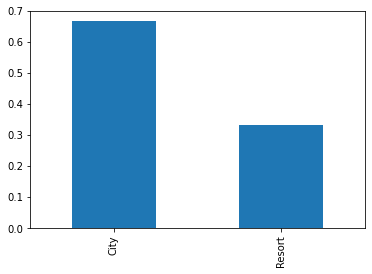

In [52]:
# What percentage of 
# the total number of reservations
# came from each hotel?
resort_and_city_hotel['Hotel'] \
    .value_counts(normalize=True) \
    .plot(kind="bar")

So, about 2/3 of the reservations are for the city hotel and 1/3 for the Resort hotel.

We can't tell from this data, but maybe the resort hotel contributes more revenue on a per-customer basis. Don't know. Can't know from the data we have, but it might be worth exploring if we ever have the opportunity to integrate revenue data into our analysis. 

Let's look at the IsCanceled variable.

<AxesSubplot:>

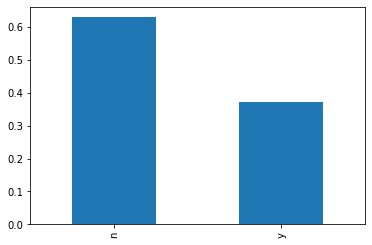

In [53]:
# What percentage of 
# the total number of reservations
# came from each hotel?
resort_and_city_hotel['IsCanceled'] \
    .value_counts(normalize=True) \
    .plot(kind="bar")

Holy cannoli! Is this true? Are nearly 40% of reservations *canceled*?

I need to see this in a different view.

In [54]:
# For the entire dataset,
# what is the percentage 
# of reservations 
# that were canceled?
resort_and_city_hotel['IsCanceled'] \
    .value_counts(normalize=True)

n    0.628627
y    0.371373
Name: IsCanceled, dtype: float64

Grouped by hotel?

In [55]:
# What is the percentage 
# of reservations 
# that were canceled,
# grouped by hotel?
resort_and_city_hotel.groupby(['Hotel'])['IsCanceled'] \
    .value_counts(normalize=True)

Hotel   IsCanceled
City    n             0.582881
        y             0.417119
Resort  n             0.720250
        y             0.279750
Name: IsCanceled, dtype: float64

Well. This is something that should definitely be explored more deeply. Based on the data we have, of all the reservations booked at the city hotel, 42% of them&#8212;*42%!*&#8212;were canceled.

If I had to guess, I would guess that this is already on hotel management's radar. This definitely warrants further investigation as we get deeper into the analysis (in upcoming posts). But the first question that comes up for me is: "What is the industry average for hotel cancelations?" Maybe we're not too far off from the average? <a href="https://www.google.com/search?q=average+hotel+cancelation+rate&rlz=1C1CHBF_enUS780US780&sxsrf=AOaemvI5en2CmtXoZWYBVa60dMpCayaBqA:1636988510218&source=lnt&tbs=qdr:y&sa=X&ved=2ahUKEwis_Zu10Zr0AhWPXM0KHdLPCfEQpwV6BAgBECU&biw=1495&bih=709&dpr=1.71" target="_blank">One quick internet search</a> reveals that, indeed, maybe we *aren't* too far off from the average, and in fact, maybe the resort hotel is soundly beating the global industry average. But it still begs the question: why and when are customers canceling?

Indeed, if <a href="http://tmstudies.net/index.php/ectms/article/viewFile/1000/pdf_51" target="_blank">you read the paper</a> written by the professors who also published the <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191" target="_blank">ScienceDirect article</a>, you'll see that cancelation rates are in fact predictable (and beyond the scope of what we're trying to do in this particular post). 

Let's move on to the DepositType variable. How many different deposit types are there?

In [56]:
# How many unique values are there
# in the DepositType column
# of the resort_and_city_hotel dataframe?
resort_and_city_hotel['DepositType'] \
    .nunique()

3

Okay. Only three. And what are they and how many of each are there?

In [57]:
# For the entire dataset,
# what are the deposit types, and
# how many of each deposit type
# are there?
resort_and_city_hotel['DepositType'] \
    .value_counts()

No Deposit    104167
Non Refund     14573
Refundable       162
Name: DepositType, dtype: int64

The <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005" target="_blank">Variables Description table in the ScienceDirect article</a>, provides us with the following definitions of these categories:
* No Deposit – no deposit was made
* Non Refund – a deposit was made in the value of the total stay cost
* Refundable – a deposit was made with a value under the total cost of stay

So, clearly, the vast majority of reservations are made without a deposit.

Let's look at the percentages for the combined data . . .

In [58]:
# For the entire dataset,
# what is the percentage 
# of each deposit type?
resort_and_city_hotel['DepositType'] \
    .value_counts(normalize=True)

No Deposit    0.876074
Non Refund    0.122563
Refundable    0.001362
Name: DepositType, dtype: float64

 . . . and for each hotel . . .?

In [59]:
# What is the percentage 
# of each deposit type,
# grouped by hotel?
resort_and_city_hotel.groupby(['Hotel'])['DepositType'] \
    .value_counts(normalize=True)

Hotel   DepositType
City    No Deposit     0.837667
        Non Refund     0.162081
        Refundable     0.000252
Resort  No Deposit     0.953000
        Non Refund     0.043413
        Refundable     0.003586
Name: DepositType, dtype: float64

The city hotel aligns a little more with the percentages for the entire dataset, while the resort hotel has quite a few more "no deposit" reservations compared to both the city hotel specifically and the dataset in its entirety. 

But look at the Refundable category. Around 14x more reservations choose the Refundable option at the Resort hotel than they do at the City hotel. Again: why? Worth exploring later.

Now let's look at the MarketSegment variable.

How many unique values are in this column?

In [60]:
# How many unique values are there
# in the MarketSegment column
# of the resort_and_city_hotel dataframe?
resort_and_city_hotel['MarketSegment'] \
    .nunique()

8

What are the 8 different categories of market segments?

In [61]:
# For the entire dataset,
# how many reservations were made
# for each market segment? 
resort_and_city_hotel['MarketSegment'] \
    .value_counts()

Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: MarketSegment, dtype: int64

Two of the reservations have an undefined market segment.

Let's see what those records look like.

In [62]:
# Display all of the reservations
# that list "Undefined"
# in the MarketSegment variable
resort_and_city_hotel.loc[resort_and_city_hotel['MarketSegment'] == \
                          'Undefined'] 

,Adults,Children,Babies,Meal,ReservedRoomType,RequiredCarParkingSpaces,Country,ArrivalDate,Agent,Company,...,DaysInWaitingList,TotalOfSpecialRequests,DepositType,MarketSegment,DistributionChannel,AssignedRoomType,ADR,LeadTime,ReservationStatus,ReservationStatusDate
40136,2,0,0,BB,B,0,PRT,2015-08-03,0,0,...,0,1,No Deposit,Undefined,Undefined,B,12.0,2,Canceled,2015-08-01
40215,3,0,0,BB,B,0,PRT,2015-08-05,0,0,...,0,2,No Deposit,Undefined,Undefined,B,18.0,1,Canceled,2015-08-04


Okay. Well, both of these reservations were canceled&#8212;which makes me wonder why the ADR is anything greater than 0 for both of these, but that's a question for another day. Maybe it's a cancelation fee? Can't know from this data.

Right now, based on what we know about the data so far, namely that the vast majority of reservations come from Online TAs and because these two particular reservations do not indicate they are from a Company, I'm inclined to change the market segment for both of these reservations to Online TA.

Let's do that now.

In [63]:
# In the resort_and_city_hotel dataframe
# change every Undefined to Online TA
# in the MarketSegment column
resort_and_city_hotel.loc[
    resort_and_city_hotel['MarketSegment'] == 'Undefined',
    'MarketSegment'] = 'Online TA'

Check our work. If we did this correctly, we should see 56,405 Online TA reservations, no undefined market segments, and only 7 market segment categories.

In [64]:
resort_and_city_hotel['MarketSegment'] \
    .value_counts()

Online TA        56405
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Name: MarketSegment, dtype: int64

Okay. Looking good. Let's do the same thing for the DistributionChannel variable.

How many unique values are there in the DistributionChannel variable?

In [65]:
# How many unique values are there
# in the DistributionChannel column
# of the resort_and_city_hotel dataframe?
resort_and_city_hotel['DistributionChannel'] \
    .nunique()

5

What are those unique values and how many of each are there?

In [66]:
resort_and_city_hotel['DistributionChannel'] \
    .value_counts()

TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        5
Name: DistributionChannel, dtype: int64

Ah, this is interesting. 

The <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005" target="_blank">Variables Description table in the ScienceDirect article</a> doesn't provide us with much insight on what these variables mean other than TA stands for travel agents and TO stands for tour operators. But clearly, the vast majority of reservations come through one or the other of these distribution channels.

So:
* TA/TO reservations come through a third-party (namely, the travel agent or tour operator)
* Direct reservations are made directly on the hotel's website (no third party)
* Corporate reservations are generally made business-to-business (so no third party, but directly between the corporate buyer and the hotel).
* GDS (global distribution system) reservations are through a third-party (if you've ever booked a flight and then booked a hotel and car all through the airline's website, you've probably booked a GDS reservation and not even known it).

Buuuut . . . we know what do with those undefined distribution channels.

Because most of the reservations are from the TA/TO channel, we're simply going to apply the TA/TO distribution channel to those five reservations.

In [67]:
# In the resort_and_city_hotel dataframe
# change every Undefined to TA\TO
# in the DistributionChannel column
resort_and_city_hotel.loc[
    resort_and_city_hotel['DistributionChannel'] == 'Undefined',
    'DistributionChannel'] = 'TA/TO'

Check our work . . .

In [68]:
resort_and_city_hotel['DistributionChannel'] \
    .value_counts()

TA/TO        97735
Direct       14483
Corporate     6491
GDS            193
Name: DistributionChannel, dtype: int64

And we're good to go.

Last up of the categorical variables is ReservationStatus.

How many unique values are there in this variable?

In [69]:
# How many unique values are there
# in the ReservationStatus column
# of the resort_and_city_hotel dataframe?
resort_and_city_hotel['ReservationStatus'] \
    .nunique()

3

And they are . . .

In [70]:
# For the entire dataset,
# how many of each ReservationStatus
# are there? 
resort_and_city_hotel['ReservationStatus'] \
    .value_counts()

Check-Out    74745
Canceled     42954
No-Show       1203
Name: ReservationStatus, dtype: int64

Viewed as percentages . . .

In [71]:
# For the entire dataset,
# how many of each ReservationStatus
# are there? 
resort_and_city_hotel['ReservationStatus'] \
    .value_counts(normalize=True)

Check-Out    0.628627
Canceled     0.361255
No-Show      0.010118
Name: ReservationStatus, dtype: float64

 This aligns with what we discovered earlier: around 40% of reservations are canceled.
 
 But, 63% of reservations do check out, which indicates these are the customers that showed up, stayed, and checked-out.
 
 However, the 1% of reservations that are no shows is an interesting development. This amounts to 1203 reservations. 
 
 Let's take a look at a random group of 10 of these No-Show reservations.

In [72]:
# Display a random selection
# of 10 reservations
# where the ReservationStatus
# is equal to No-Show
resort_and_city_hotel[resort_and_city_hotel['ReservationStatus'] == \
                      'No-Show'].sample(n=10)

,Adults,Children,Babies,Meal,ReservedRoomType,RequiredCarParkingSpaces,Country,ArrivalDate,Agent,Company,...,DaysInWaitingList,TotalOfSpecialRequests,DepositType,MarketSegment,DistributionChannel,AssignedRoomType,ADR,LeadTime,ReservationStatus,ReservationStatusDate
40450,2,0,0,BB,A,0,PRT,2015-08-09,27,0,...,0,1,No Deposit,Offline TA/TO,TA/TO,A,63.75,107,No-Show,2015-08-09
47343,2,0,0,NM,A,0,DZA,2016-03-04,9,0,...,0,0,No Deposit,Online TA,TA/TO,A,83.40,17,No-Show,2016-03-04
72285,1,0,0,BB,A,0,FRA,2017-08-05,9,0,...,0,1,No Deposit,Online TA,TA/TO,A,121.50,102,No-Show,2017-08-05
54168,2,0,0,BB,A,0,PRT,2016-07-22,0,40,...,0,0,No Deposit,Corporate,Corporate,E,75.00,0,No-Show,2016-07-22
54355,2,0,0,BB,D,0,GBR,2016-07-27,9,0,...,0,1,No Deposit,Online TA,TA/TO,A,99.45,191,No-Show,2016-07-27
60490,2,0,0,BB,D,0,PRT,2016-11-28,0,0,...,0,0,No Deposit,Groups,TA/TO,D,80.00,35,No-Show,2016-11-28
48725,1,0,0,BB,A,0,PAK,2016-04-07,9,0,...,0,0,No Deposit,Online TA,TA/TO,A,80.75,79,No-Show,2016-04-07
64112,1,0,0,BB,A,0,PRT,2017-03-13,254,0,...,0,0,No Deposit,Groups,TA/TO,A,178.00,20,No-Show,2017-03-13
48927,2,0,0,BB,D,0,GEO,2016-04-12,9,0,...,0,0,No Deposit,Online TA,TA/TO,D,143.60,9,No-Show,2016-04-12
10211,2,0,0,BB,D,0,PRT,2017-02-20,0,0,...,0,1,No Deposit,Direct,Direct,D,53.00,2,No-Show,2017-02-20


So, that's what I was wondering. Scroll over and look at the ADR column. Every one of these reservations includes an ADR, but does that mean the customer was charged this rate for their stay even though the custome did not show? Or does it mean that the customer *would* have paid (but did *not* pay) this amount? Does it mean something else? 

What we *do* know from the <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005" target="_blank">Variables Description table in the ScienceDirect article</a> is that No-Show reservations " . . . did not check-in &#91;but&#93;  did inform the hotel of the reason why." In any case, this might be worthy of further investigation: Why do No-Show reservations show a positive ADR?

What if we break this down by hotel?

In [73]:
# What is the percentage 
# of each ReservationStatus,
# grouped by hotel?
resort_and_city_hotel.groupby(['Hotel'])['ReservationStatus'] \
    .value_counts(normalize=True)

Hotel   ReservationStatus
City    Check-Out            0.582881
        Canceled             0.405568
        No-Show              0.011550
Resort  Check-Out            0.720250
        Canceled             0.272502
        No-Show              0.007248
Name: ReservationStatus, dtype: float64

Clearly, if we only look at this view of the data, the Resort hotel is doing a much better job of converting booked customers to customers who complete their stay.

Again: why? What, if anything, is the Resort hotel doing differently than City hotel to have far fewer no-shows and far more customers who complete their stay and check out?

Okay, that's it for this post. Before you go, think about these questions:
* What have you learned about the hotel bookings data so far? (write down what you learned about the data)
* What questions do you have about the data? (write those questions down)
* What have you learned about asking your data questions with Python? (write this down, too)
* What questions do you have about asking questions of data? (write this down . . .)

More to come in Part 4.

<a href="http://gettoknowdata.com/category/exploring-data/hotel-bookings/">All posts in the Hotel Bookings series</a>.